# Business Understanding

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
from scipy import stats

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, KFold, StratifiedShuffleSplit,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold,  StratifiedShuffleSplit

from tqdm.notebook import tqdm ,tnrange
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train = train.drop(columns=['days_since_prev_campaign_contact'], axis=1)
test = test.drop(columns=['days_since_prev_campaign_contact'], axis=1)

train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], axis=0).reset_index(drop = True)

In [4]:
data

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,source
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0.0,train
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0.0,train
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0.0,train
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0.0,train
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,0,unknown,NaN,test
45207,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,0,unknown,NaN,test
45208,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,0,unknown,NaN,test
45209,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,5,failure,NaN,test


In [5]:
data.isna().sum()

id                                0
customer_age                    889
job_type                          0
marital                         231
education                         0
default                           0
balance                         580
housing_loan                      0
personal_loan                   223
communication_type                0
day_of_month                      0
month                             0
last_contact_duration           433
num_contacts_in_campaign        157
num_contacts_prev_campaign        0
prev_campaign_outcome             0
term_deposit_subscribed       13564
source                            0
dtype: int64

# Data Understanding

## Variable 	Description
- id 	Unique identifier for each sample in the dataset. Cannot be used for modelling
- customer_age 	Age of the Customer in years
- job_type 	Type of job of the customer
- marital 	Marital Status of the Custmer
- education 	Education Level of the Customer
- default 	Whether customer has Defaulted in Past
- balance 	Current Balance in the Customer's Bank
- housing_loan 	Has customer taken a Housing Loan
- personal_loan 	Has customer taken a Personal Loan
- communication_type 	Type of communication made by the bank with the customer
- day_of_month 	Day of month of the last contact made with customer
- month 	Month for the last contact made with customer
- last_contact_duration 	Last Contact duration made with the customer (in seconds)
- num_contacts_in_campaign 	Number of contacts made with the customer during the current campaign.
- days_since_prev_campaign_contact 	Number of days passed since customer was contacted in previous campaign.
- num_contacts_prev_campaign 	Number of contacts made with the customer during the previous campaign.
- prev_campaign_outcome 	Success or Failure in previous Campaign.
- term_deposit_subscribed 	(Target) Has the customer taken a term deposit ?

### Target: term_deposit_subscribed (0 or 1)

- The data has missing values as seen above which needs to be handled

### Hypothesis Generation

* Are younger customers more likely to subscribe to a term deposit as compared to old customers ?
    - Customers with age 28-43 seem more interested in term deposits, hence very old or very young customers do not have the stability for that. However, retired persons of ages 60 and above show higher interests and median of age of interested customers is also high.

* Are people with a higher bank balance more likely subscribe to term deposit than people with low balance ?
    - Yes, we noted that the median of balance of the interested customers is having higher balance.

* Does a married person have higher chances to subscribe to a term deposit compared to a single or divorced person ?
    - Divorce persons are broke compared to married and single, however marriage does not necessarily translate to guaranteed interest either.

* Does the length of the call made to the customers tell us anything about their chances of subscribing ?
(One may think that if the call length is longer, the customer executive has spent a longer time, discussing details with customer, hence the customer is more likely to subscribe), and it turns out to be true.

# Exploratory Data Analysis


## Univariate Analysis

- Term Deposit Subscribed: It is highly imbalanced in nature, needs to be normalized.
- Job Type: A majority of customers are in management, technical or blue-collar jobs, rest are in minorities, and few are students and even unemployed.
- Marital: 60 percent of the people are married, while some 12 percent are divorced, sad life!
- Education: 51 percent of the people are secondary in education minimum, while a good percentage are in tertiary education too.
- Personal Loan: Only 2 percent of the people are having personal loans, which is in huge minority.
- Housing Loan: Nearly almost half of the customers have a house loan.
- Communication Type: Everyone has nearly a good amount of cellular connection in form of mobiles or telephones, however around 29 percent have unknown type, which indicates a certain rural background of customers too.
- Month wise May, June, July and August are most profitable, while other months are not that contributive hence, we get the idea of peak season.
- The previous campaign success is widely unknownn within the data.
- Customer Age is more dense towards 30 to 40 aged people, and there are many outliers in form of old aged people as well however the data does not appear to be much skewed.
- Balance is highly right skewed and has negative, zero and positive values, that needs to be explained.
- Last Contact Duration is also right skewed and has too dense values in the left.
- The days of the month is pretty equitable in terms of distribution.
- Days since previous campaign is also almost symmetric.
- Number of contacts in previous campaigns is limited and gives more of a categorical feel than a numerical feature due to its consistency.

In [12]:
# Segregating Numerical and Categorical Columns
col_id = 'id'
col_y = 'term_deposit_subscribed'
src = 'source'
features = [c for c in train.columns if c not in [col_id, col_y, src]]
cat_cols = data.select_dtypes(include=['object'])

# categorical variables
cat_cols = [c for c in features if c in cat_cols]
# numerical variables
num_cols = [n for n in features if n not in cat_cols]

display(cat_cols)
display(num_cols)

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign']

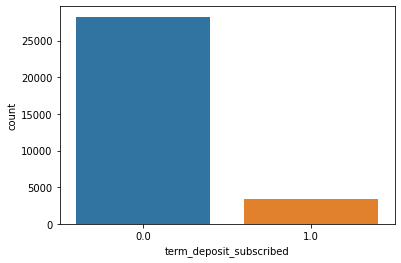

In [12]:
# Target Distribution

sns.countplot(data['term_deposit_subscribed'])

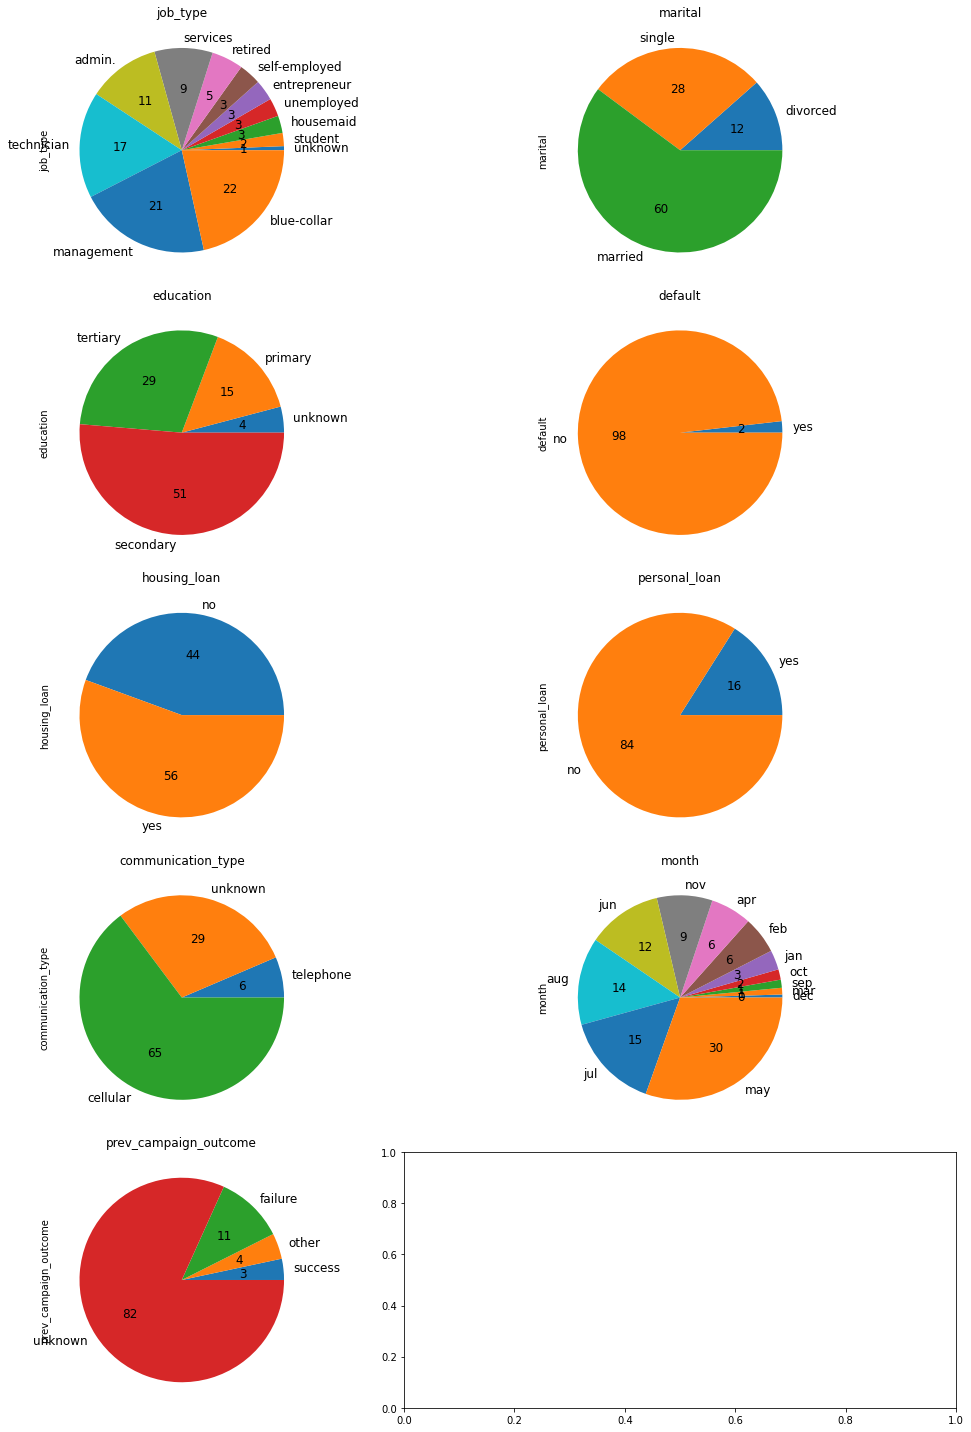

In [9]:
def pie_chart(data, list_of_cols):
    fig, axes = plt.subplots(5,2, figsize=(15,20))
    axes = [ax for axes_row in axes for ax in axes_row]
    
    for i, c in enumerate(data[list_of_cols]):
        _ = data[c].value_counts()[::-1].plot(kind='pie',ax=axes[i], title=c, 
                                              autopct="%.0f", fontsize=12)
        _ = axes[i].set_label('')
        _ = plt.tight_layout()
pie_chart(data, cat_cols)

In [19]:
def univariate_count(data, list_of_cols):
    fig, axes = plt.subplots(3, 3, figsize=(16, 16))
    axes = [ax for axes_row in axes for ax in axes_row]

    for i, c in enumerate(train[list_of_cols]):
        _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
    _ = plt.tight_layout()

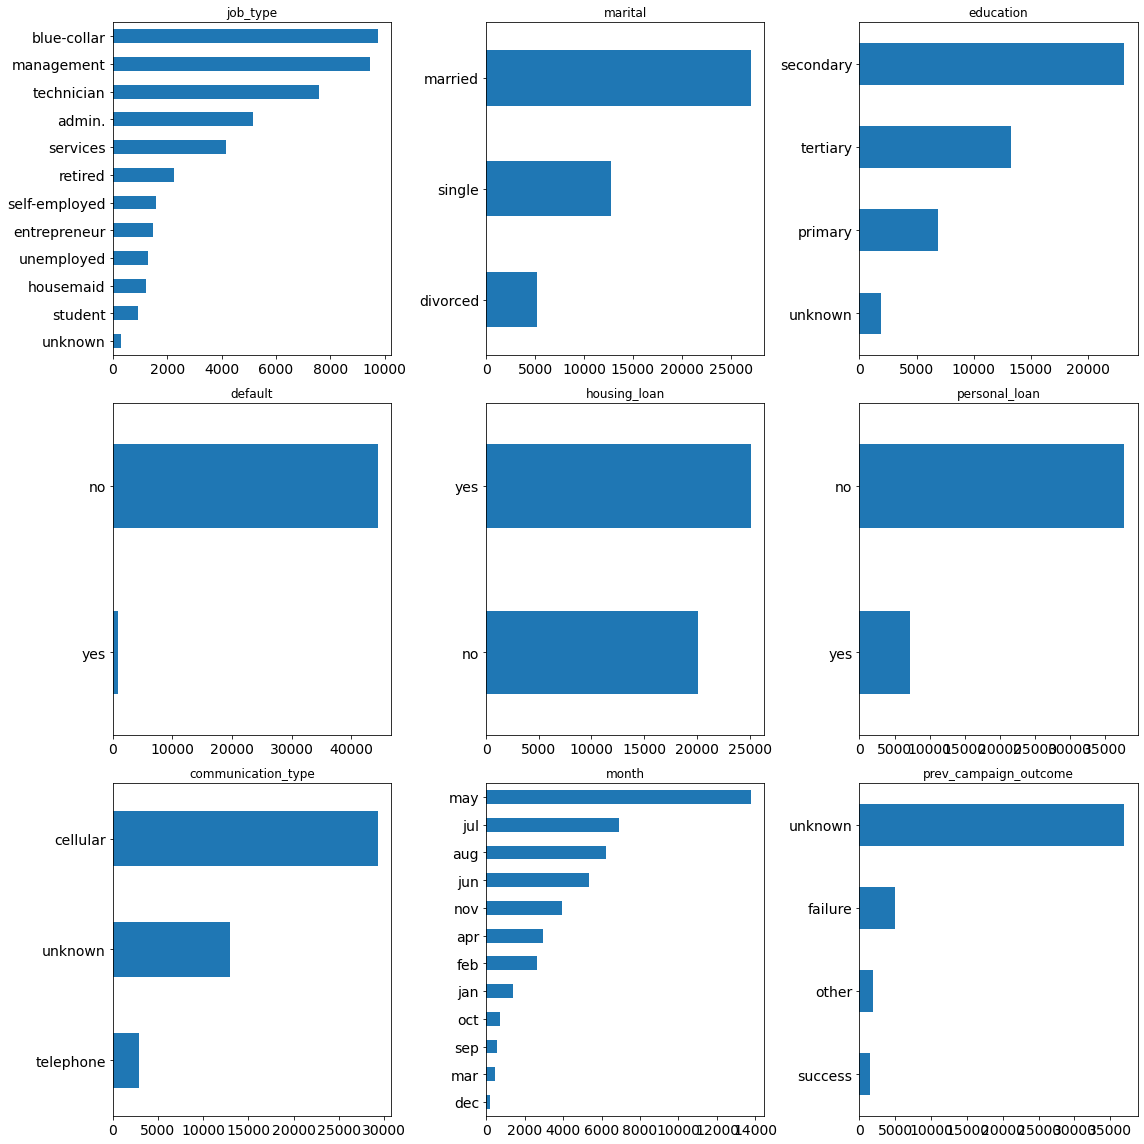

In [21]:
univariate_count(data, cat_cols)

In [17]:
def data_distribution(data, feature):
    
    plt.figure(figsize = (20,5))
    print("Distribution of ", feature)
    plt.subplot(1,3,1)
    sns.kdeplot(data[feature], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(data[feature])

    plt.subplot(1,3,3)
    sns.boxplot(data[feature], orient = 'vertical')

    print("Skewness : {}, Kurtosis : {}".format(data[feature].skew(), data[feature].kurtosis()))
    plt.show()

Distribution of  customer_age
Skewness : 0.6633554104707464, Kurtosis : 0.3079426491375705


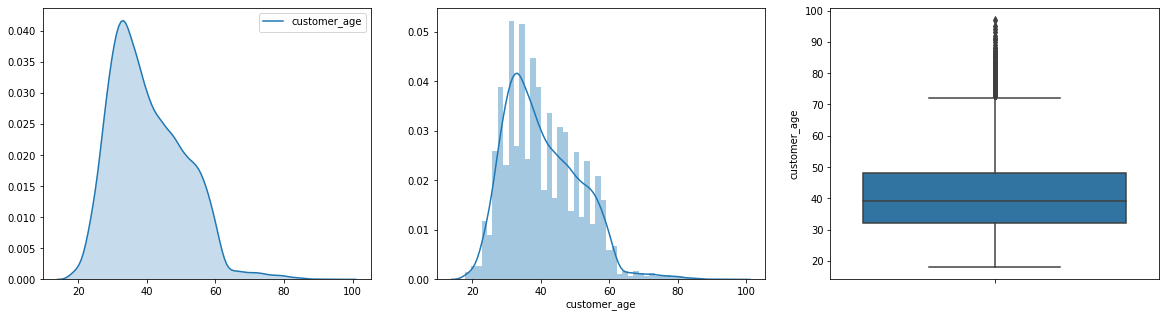

Distribution of  balance
Skewness : 8.087327690035934, Kurtosis : 133.28741119661424


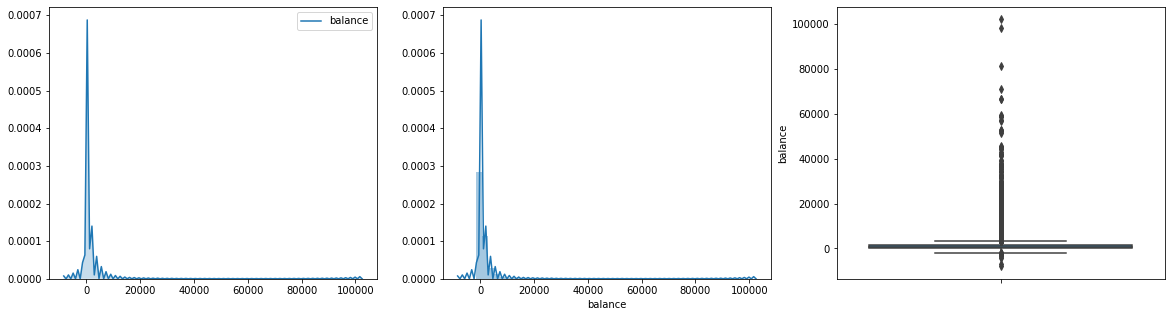

Distribution of  day_of_month
Skewness : 0.09307901402122407, Kurtosis : -1.0598973728286012


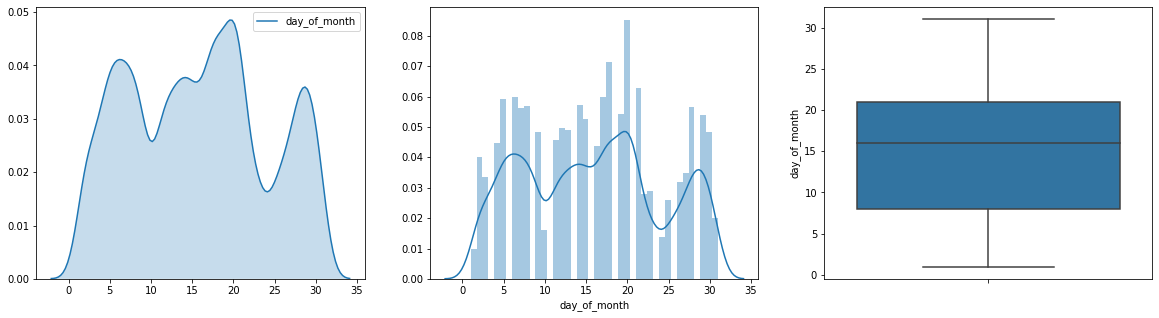

Distribution of  last_contact_duration
Skewness : 3.1336760544585096, Kurtosis : 18.081720644407078


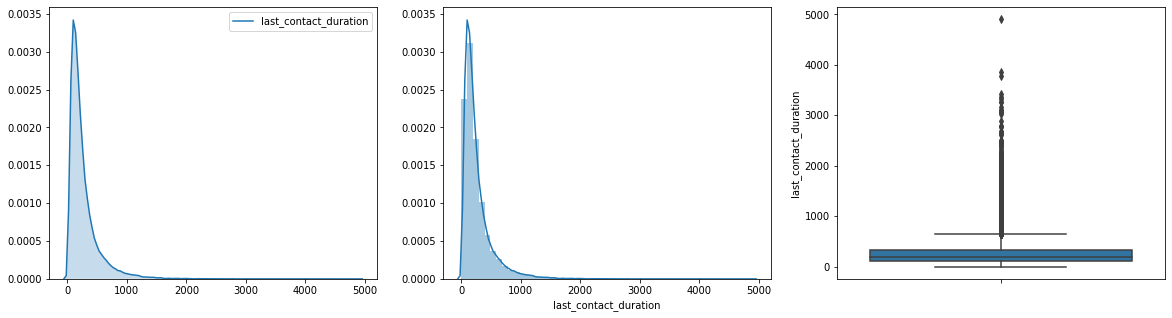

Distribution of  num_contacts_in_campaign
Skewness : 4.862436855548525, Kurtosis : 38.53556814919442


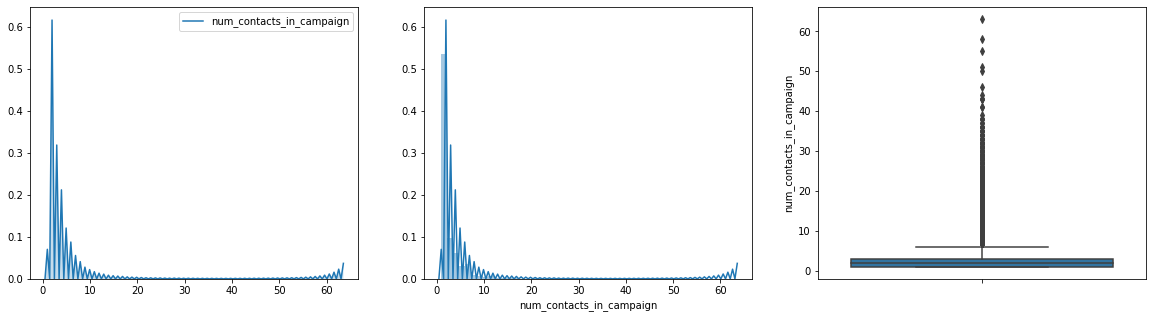

Distribution of  days_since_prev_campaign_contact
Skewness : 0.6931397093928039, Kurtosis : 1.5286825203029069


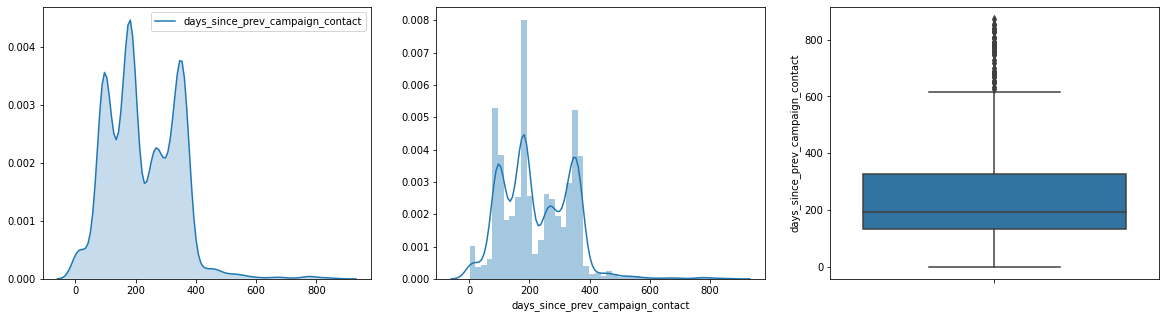

Distribution of  num_contacts_prev_campaign
Skewness : 41.84645447266289, Kurtosis : 4506.86066018326


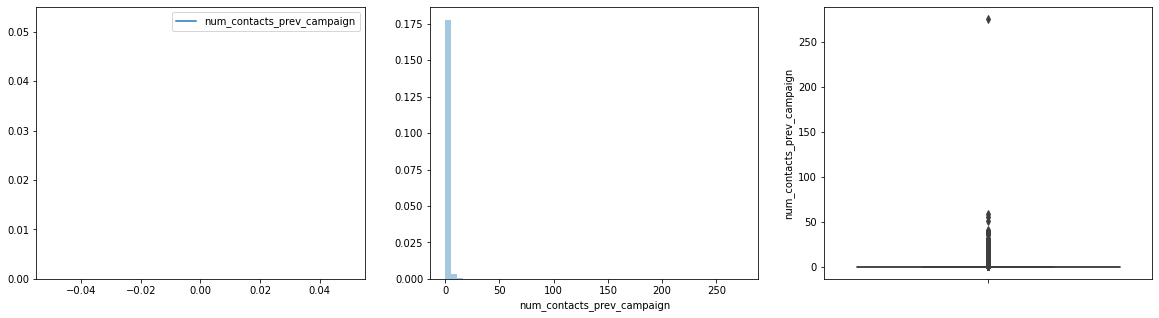

In [18]:
for i in num_cols:
    data_distribution(data, i)

## Bivariate Analysis

- The number of blue collar occupation customers interested are less, while management and students are much more interested, retired and unemployed are also more into term deposits, which indicates that the non-working class is more likely to be the correct target audience for this problem.

- Marriage does not necessarily increase the chances of term deposit as evident from the graphs. While, divorced and singles are more likely interested.

- Tertiary sector is more interested in making a term deposit comparatively.

- The people without housing loans are more likely to invest in term deposits.

- Dec, Mar, Sep, Oct, Apr are months having more subscribers discarding findings of univariate analysis.

- Success in previous campaign gurantees to a degree interst in subscription.

In [24]:
def bivariate_count(data, list_of_cols, target):
    fig, axes = plt.subplots(5, 2, figsize=(16, 24))
    axes = [ax for axes_row in axes for ax in axes_row]

    for i, c in enumerate(data[list_of_cols]):
        fltr = train[target] == 0
        vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

        vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

        vc_a[target] = 0
        vc_b[target] = 1

        df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

        _ = sns.barplot(y = c, x = 'count', data =df , hue=target, ax=axes[i])
    
    _ = plt.tight_layout()

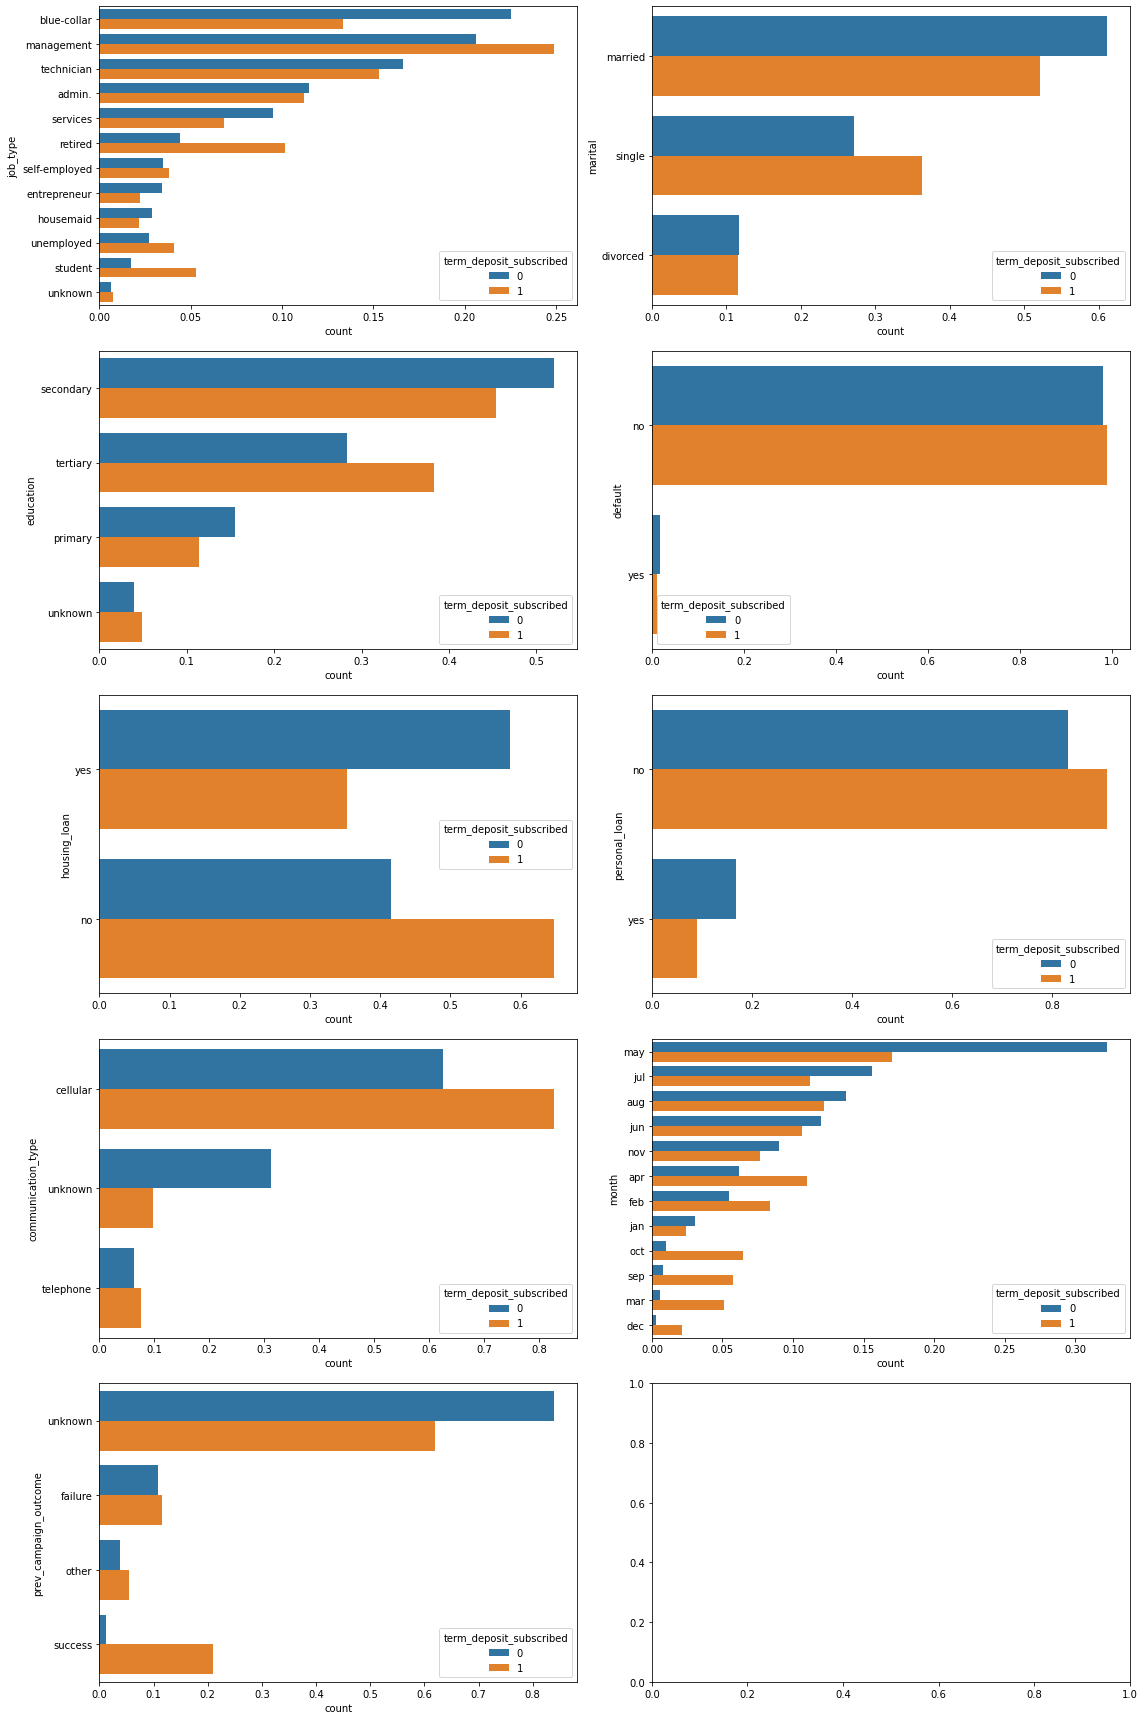

In [25]:
bivariate_count(data, cat_cols, col_y)

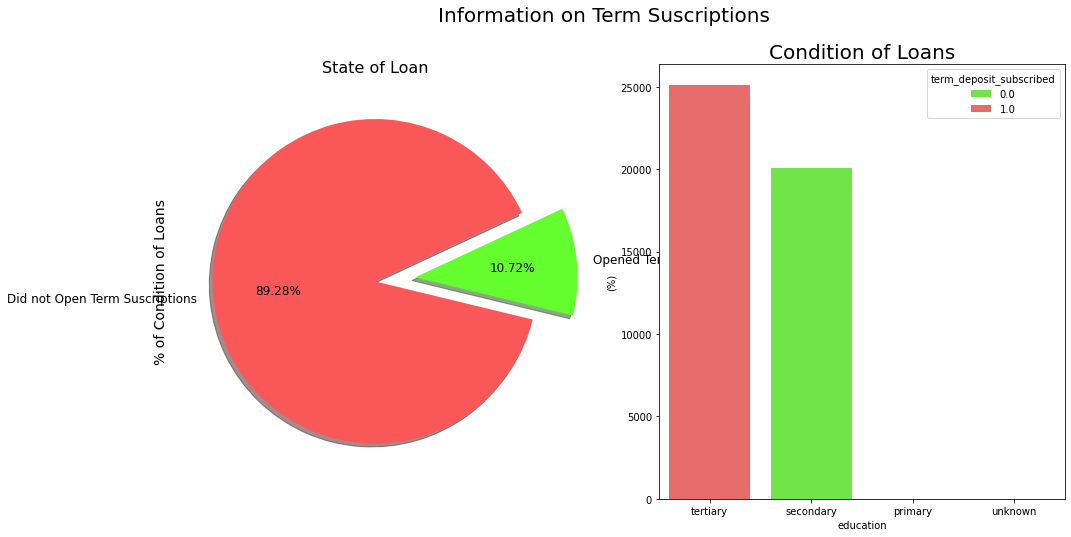

In [32]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

data["term_deposit_subscribed"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

sns.countplot('housing_loan', data=data, ax=ax[1], palette=colors)
ax[1].set_title('Condition of Loans', fontsize=20)
ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="term_deposit_subscribed", data=data, palette=palette, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(data["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [44]:
data_final = data.copy()
data_final["balance_status"] = np.nan
lst = [data_final]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = data_final["balance"].loc[data_final["balance_status"] == "negative"].values.tolist()
low = data_final["balance"].loc[data_final["balance_status"] == "low"].values.tolist()
middle = data_final["balance"].loc[data_final["balance_status"] == "middle"].values.tolist()
high = data_final["balance"].loc[data_final["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = data_final.groupby(['job_type', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data_final = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

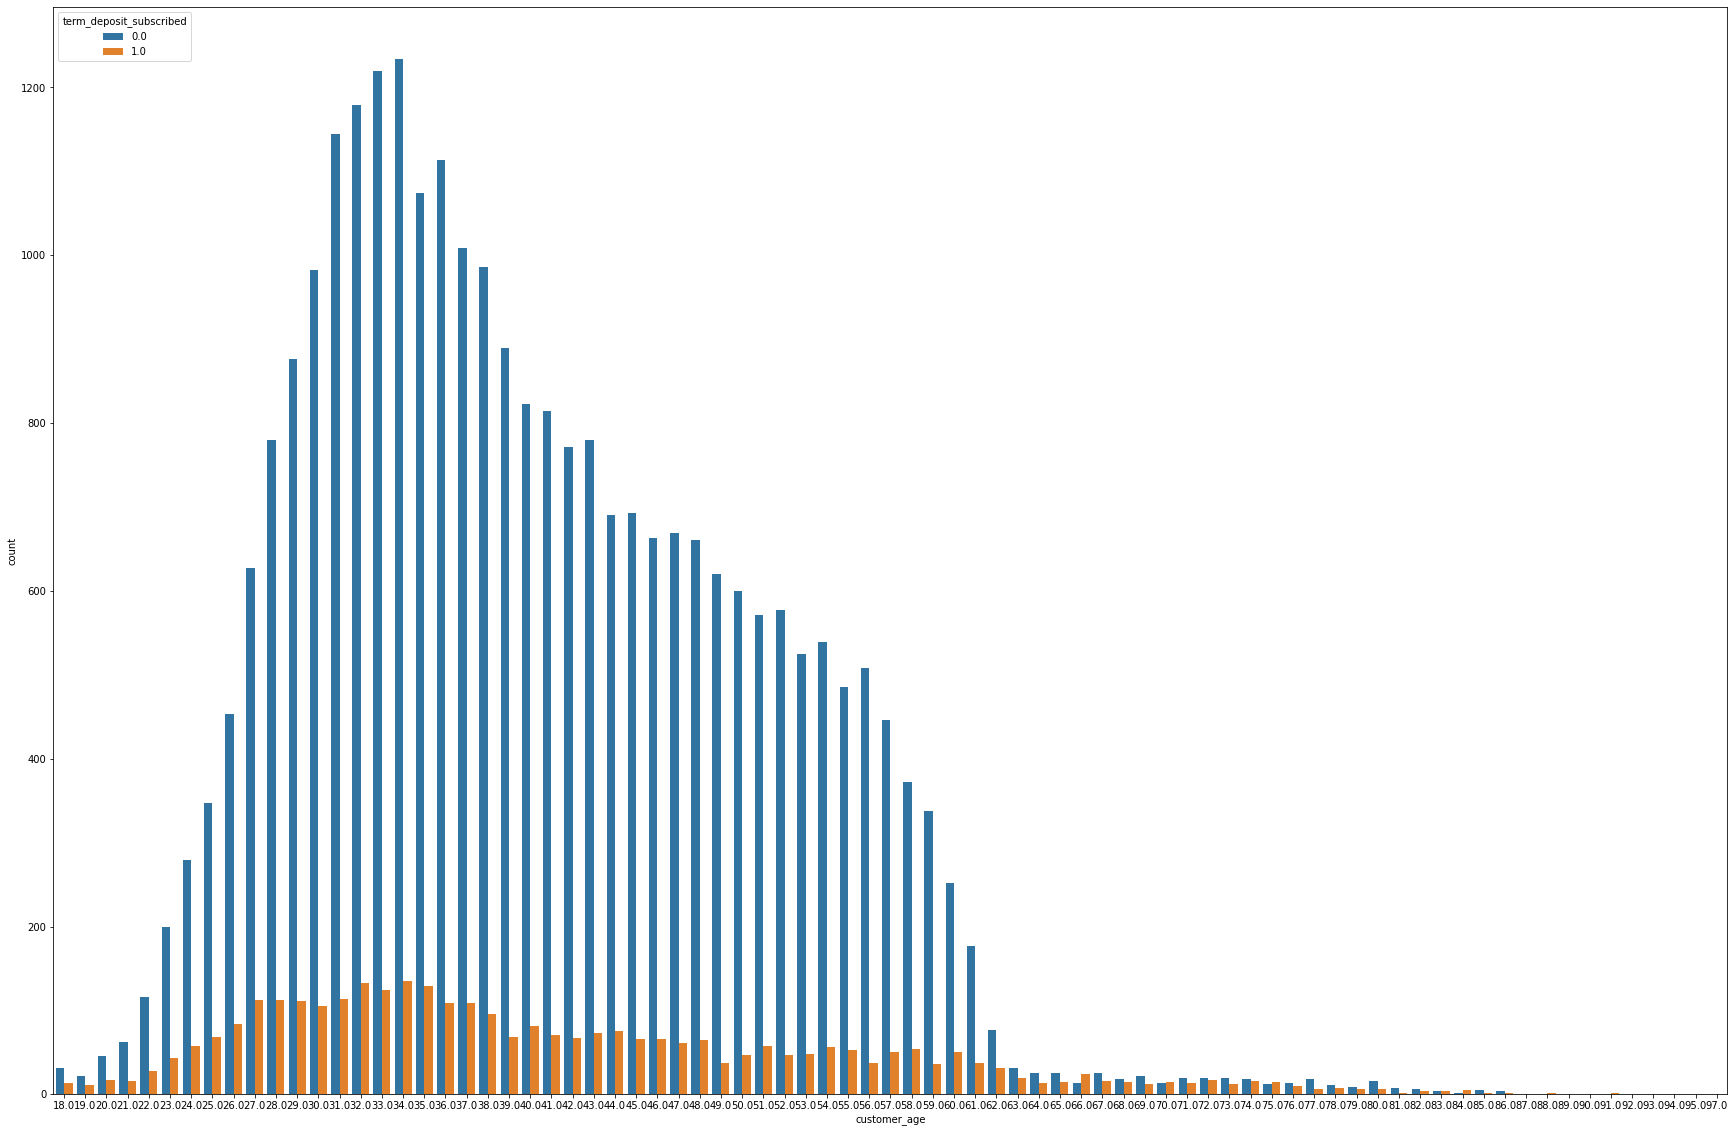

In [55]:
fig, ax = plt.subplots(figsize=(30,20))
sns.countplot(x='customer_age', hue='term_deposit_subscribed', data=data_final, ax=ax)

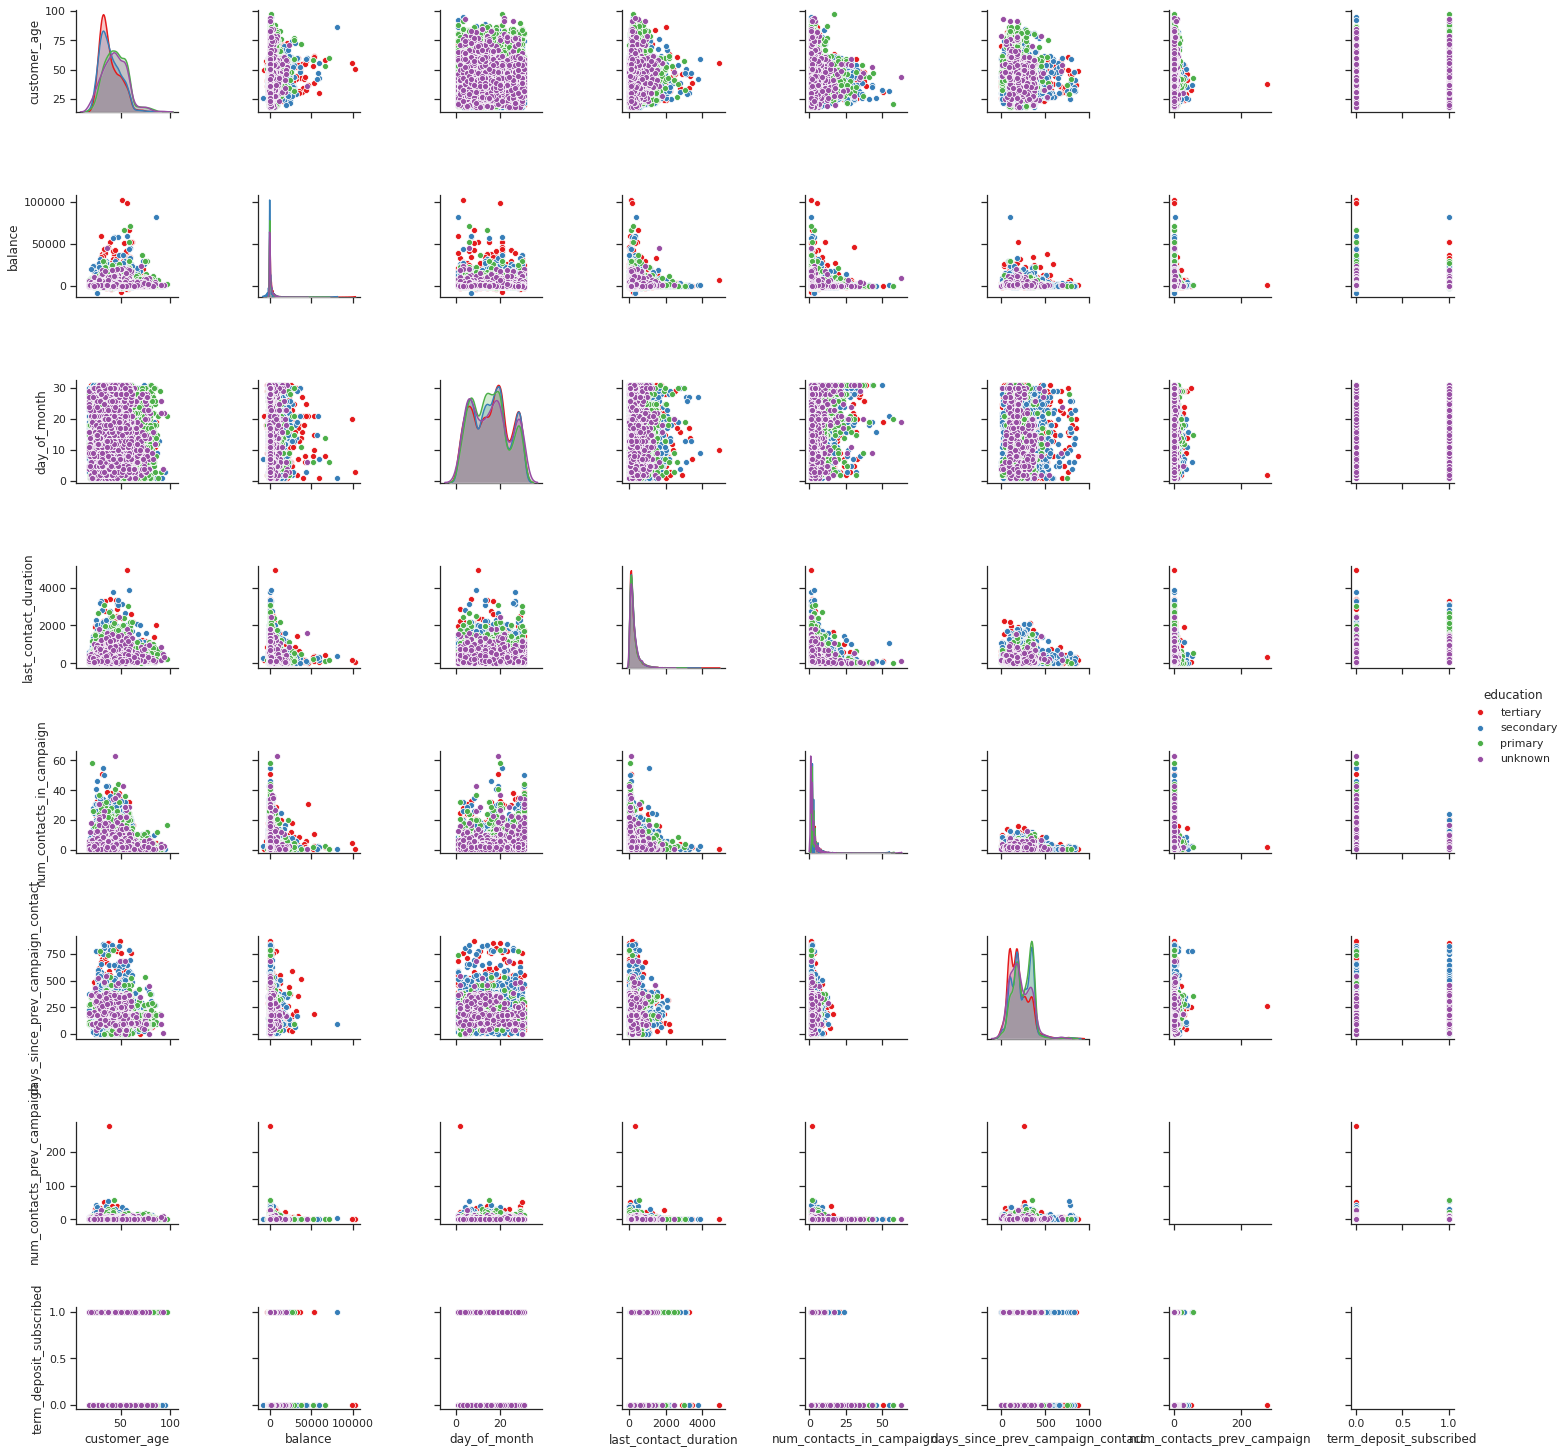

In [62]:
sns.set(style="ticks")

sns.pairplot(data_final, hue="education", palette="Set1")
plt.show()

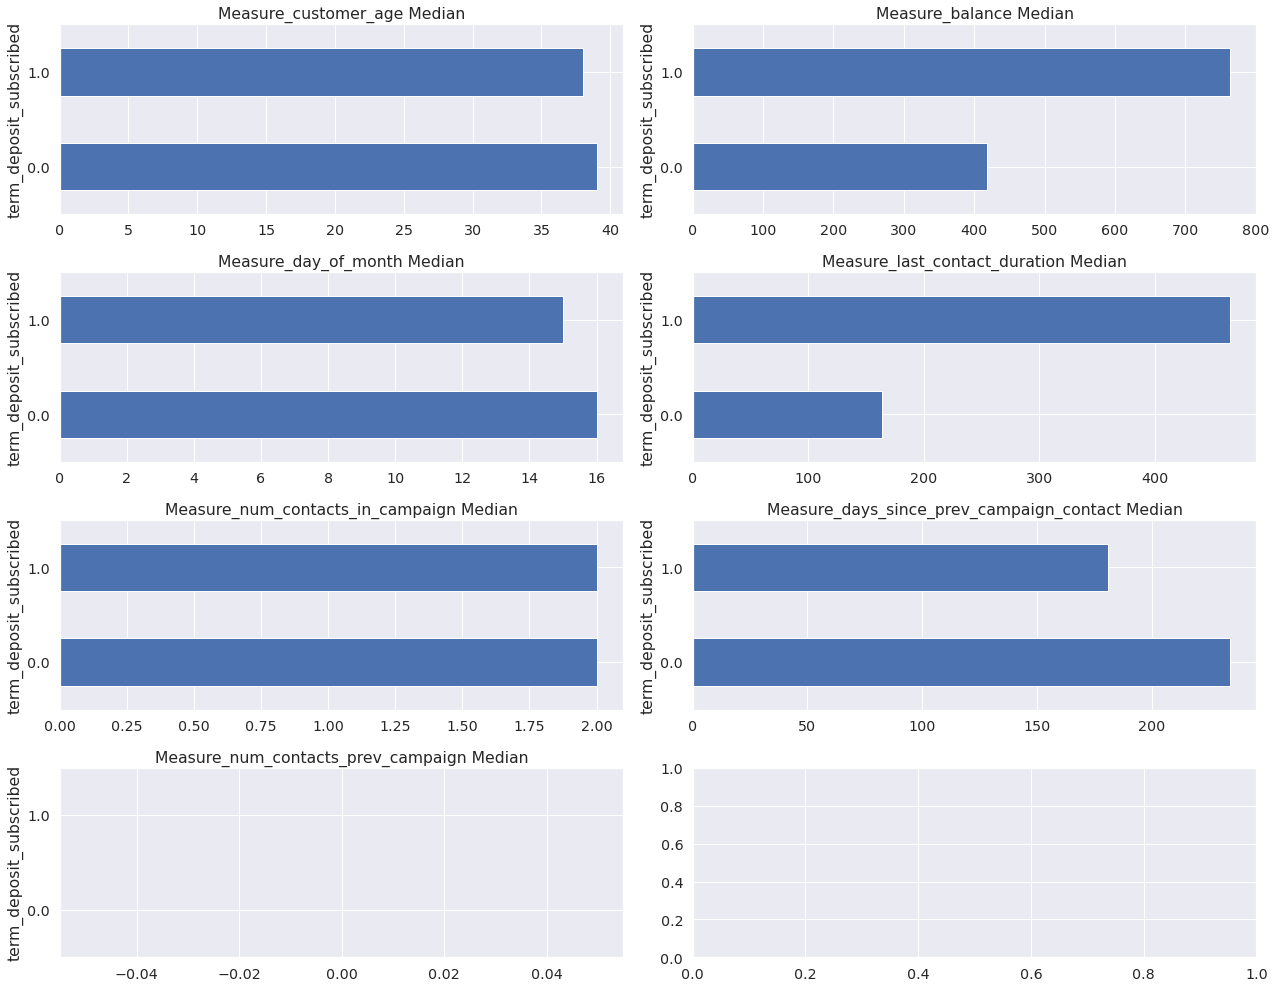

In [70]:
def median_target_comparison(data, target, list_of_cols):
    sns.set(font_scale=1.3)
    fig, axes = plt.subplots(4, 2, figsize=(18, 14))
    axes = [ax for axes_row in axes for ax in axes_row]
    for i, c in enumerate(list_of_cols):
      plot = data.groupby(target)[c].median().plot(kind = 'barh', title=f'Measure_{c} Median', ax=axes[i])
    plt.tight_layout()
measure_target_comparison(data_final, 'term_deposit_subscribed', num_cols)

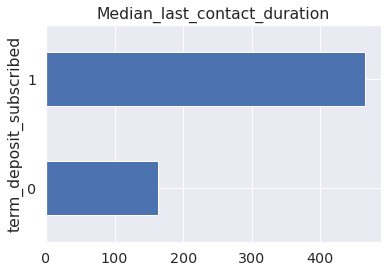

In [71]:
_ = train.groupby(col_y)['last_contact_duration'].median().plot(kind = 'barh', title=f'Median_last_contact_duration')

In [190]:
"""data['customer_age'] = data['customer_age'].bfill(axis=0)
data['marital'] = data['marital'].bfill(axis=0)
data['balance'] = data['balance'].bfill(axis=0)
data['personal_loan'] = data['personal_loan'].bfill(axis=0)
data['last_contact_duration'] = data['last_contact_duration'].bfill(axis=0)
data['num_contacts_in_campaign'] = data['num_contacts_in_campaign'].bfill(axis=0)
data['days_since_prev_campaign_contact'] = data['days_since_prev_campaign_contact'].bfill(axis=0)"""

In [13]:
data = pd.get_dummies(data, columns= cat_cols)

In [14]:
data = data.fillna(0)
data.isnull().sum()

id                               0
customer_age                     0
balance                          0
day_of_month                     0
last_contact_duration            0
num_contacts_in_campaign         0
num_contacts_prev_campaign       0
term_deposit_subscribed          0
source                           0
job_type_admin.                  0
job_type_blue-collar             0
job_type_entrepreneur            0
job_type_housemaid               0
job_type_management              0
job_type_retired                 0
job_type_self-employed           0
job_type_services                0
job_type_student                 0
job_type_technician              0
job_type_unemployed              0
job_type_unknown                 0
marital_0                        0
marital_divorced                 0
marital_married                  0
marital_single                   0
education_primary                0
education_secondary              0
education_tertiary               0
education_unknown   

# Modelling and Evaluation Metrics
**F1 Score**


In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.

The F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. 

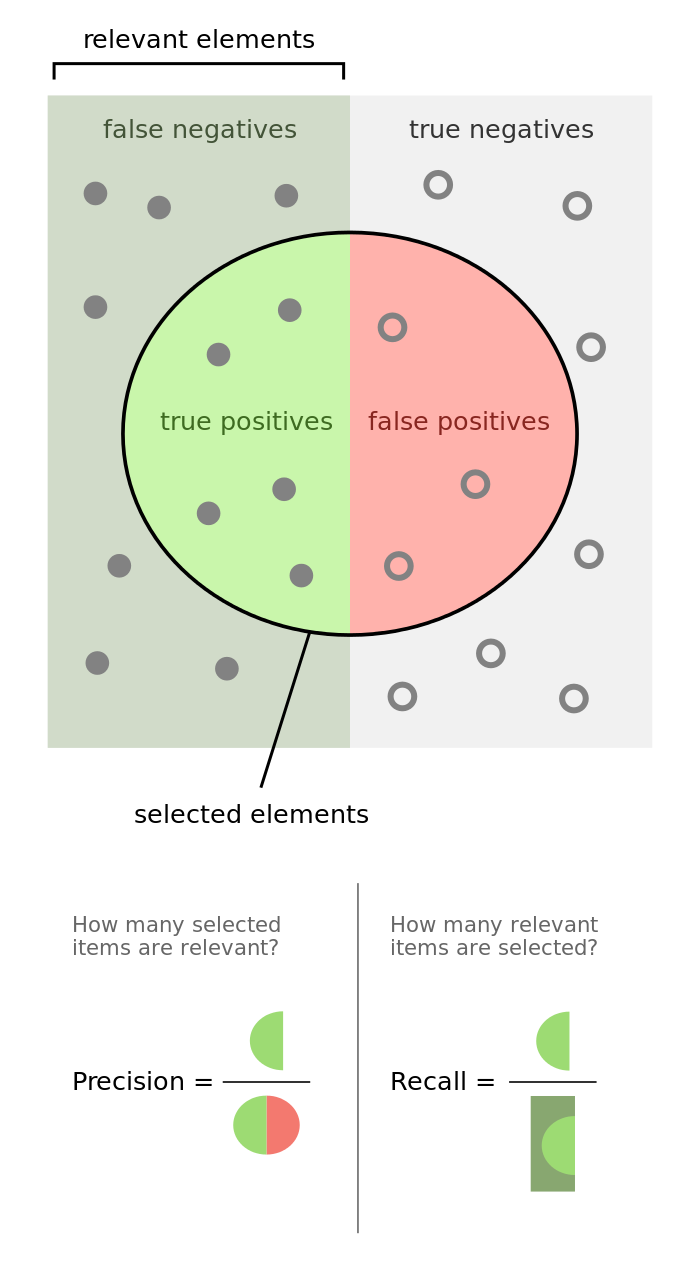


In [15]:
train_proc, test_proc = data[:train.shape[0]], data[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in ['id', 'term_deposit_subscribed', 'source']]

In [16]:
final_train, valid = train_test_split(train_proc, test_size=0.2, random_state = 1, 
                                      stratify = train_proc['term_deposit_subscribed'])

X_train, X_val = final_train[features], valid[features]

y_train, y_val = final_train['term_deposit_subscribed'], valid['term_deposit_subscribed']

X_test = test_proc[features]

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [18]:
clf = LogisticRegression(random_state = 1)
clf.fit(X_train, y_train)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.4850187265917603

In [19]:
from sklearn.tree import DecisionTreeClassifier
parameters = {
    'max_depth': [10,12,14,16,18,20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,10,20,30,40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8,16,32,64,128,256],
    'class_weight': [{0:1, 1:1}, {0:1, 1:2},{0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                        parameters,
                        scoring='f1',
                        random_state=1,
                        n_iter=20)

search = clf.fit(train_proc[features], train_proc[col_y])

search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 2}}

In [20]:
optimal_params = {'class_weight': {0: 1, 1: 2},
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 20}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
clf.fit(X_train, y_train)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.6060991105463787

In [7]:
#data['days_since_prev_campaign_contact'] = data['days_since_prev_campaign_contact'].fillna(182.0)

In [8]:
#marital = {'married':1, 'single':0, 'divorced':-1}
#data['marital'] = data['marital'].map(marital)

In [9]:
#education = {'secondary':3, 'tertiary':2, 'primary':1, 'unknown':0}
#data['education'] = data['education'].map(education)

In [106]:
#default = {'yes':1, 'no':0}
#data['default'] = data['default'].map(default)

In [11]:
#personal = {'yes':1, 'no':0}
#data['personal_loan'] = data['personal_loan'].map(personal)

In [12]:
#prev_campaign_outcome = {'success':2, 'failure':0, 'other':0.5, 'unknown':1}
#data['prev_campaign_outcome'] = data['prev_campaign_outcome'].map(prev_campaign_outcome)

In [13]:
#communication = {'cellular':2, 'unknown':0, 'telephone':1}
#data['communication_type'] = data['communication_type'].map(communication)

In [14]:
#loan = {'yes':1, 'no':0}
#data['housing_loan'] = data['housing_loan'].map(loan)

In [15]:
"""num_cols = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 
           'days_since_prev_campaign_contact',  'num_contacts_in_campaign',
           'num_contacts_prev_campaign']
cat_cols = ['job_type', 'month', 'marital', 'education', 'personal_loan', 'housing_loan',
           'default', 'prev_campaign_outcome', 'communication_type']"""

In [107]:
#data['num_contacts_in_campaign'] = data['num_contacts_in_campaign'] + data['num_contacts_prev_campaign']

In [108]:
#data['num_contacts_in_campaign'] = np.log(data['num_contacts_in_campaign'])

In [109]:
#data['num_contacts_in_campaign']+data['num_contacts_prev_campaign']

In [21]:
target = train['term_deposit_subscribed']

In [22]:
def clf_kfold(clf, train, test, features):
    n_splits = 5
    
    oofs = np.zeros(len(train))
    preds = np.zeros(len(test))
    
    folds = StratifiedKFold(n_splits=n_splits)
    
    for fold_, (train_index, val_index) in enumerate(folds.split(train, train[col_y])):
        print(f'\n------FOLD {fold_ + 1}--------')
        X_train, y_train = train[features].iloc[train_index], target.iloc[train_index]
        X_val, y_val = train[features].iloc[val_index], target.iloc[val_index]
        
        X_test = test[features]
        
        ss = StandardScaler()
        ss.fit(X_train)
        
        X_train = ss.fit_transform(X_train)
        X_val = ss.fit_transform(X_val)
        X_test = ss.fit_transform(X_test)
        
        clf.fit(X_train, y_train)
        
        preds_val = clf.predict_proba(X_val)[:,1]
        preds_test = clf.predict_proba(X_test)[:,1]
        
        fold_score = f1_score(y_val, preds_val.round())
        print("\nF1 Score is: ", fold_score)
        
        oofs[val_index] = preds_val
        preds += preds_test/n_splits
        
    oofs_score = f1_score(target, oofs.round())
    print('\n\nFinal F1-Score: ', oofs_score)
    return oofs, preds

In [23]:
dt_params = {'class_weight': {0: 1, 1: 2},
             'criterion': 'gini',
             'max_depth': 14,
             'max_features': 0.8,
             'max_leaf_nodes': 128,
             'min_samples_split': 20,
             'random_state': 1
             }

clf = DecisionTreeClassifier(**dt_params)
        

dt_oofs, dt_preds = clf_kfold(clf, train_proc, test_proc, features)


------FOLD 1--------

F1 Score is:  0.6223043746149106

------FOLD 2--------

F1 Score is:  0.6286811779769526

------FOLD 3--------

F1 Score is:  0.5586666666666668

------FOLD 4--------

F1 Score is:  0.5962025316455696

------FOLD 5--------

F1 Score is:  0.5920529801324503


Final F1-Score:  0.600128617363344


In [24]:
def get_optimal_f1_thresh(target, oofs):
  thresholds = np.arange(0, 100)/100
  thresh_scores = []
  for thresh in thresholds:
    oofs_rounded = (oofs > thresh) * 1
    thresh_score = f1_score(target, oofs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('F1 Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.36


0.6052937079173439

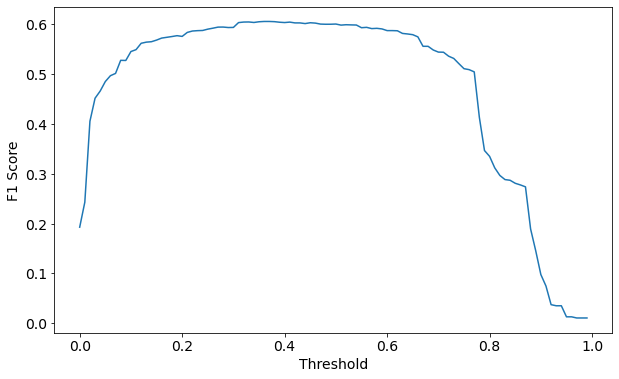

In [25]:
optimal_thresh = get_optimal_f1_thresh(target, dt_oofs)
print(f'Optimal threhold is {optimal_thresh}')
f1_score(target, (dt_oofs > optimal_thresh) * 1)

In [26]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[col_y])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  return oofs, preds


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169768
[200]	valid_0's binary_logloss: 0.167824
[300]	valid_0's binary_logloss: 0.167348
Early stopping, best iteration is:
[224]	valid_0's binary_logloss: 0.167163

F1 score for validation set is 0.5860389610389611

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.164712
[200]	valid_0's binary_logloss: 0.159964
[300]	valid_0's binary_logloss: 0.159999
Early stopping, best iteration is:
[273]	valid_0's binary_logloss: 0.159623

F1 score for validation set is 0.5900570497147515

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169066
[200]	valid_0's binary_logloss: 0.164835
[300]	valid_0's binary_logloss: 0.164824
Early stopping, best iteration is:
[228]	valid_0's binary_logloss: 0.164558

F1 sco

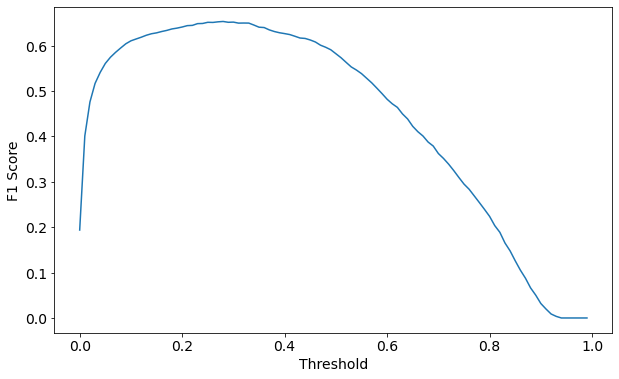

In [27]:
clf = LGBMClassifier(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100}

lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

In [28]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [29]:
final_train = data[data['source']=='train']
final_test = data[data['source']=='test']
y = final_train['term_deposit_subscribed']
X = final_train.drop(columns=['id', 'source', 'term_deposit_subscribed'], axis=1)
id_test = final_test['id']
pred_test = final_test.drop(columns=['id', 'source', 'term_deposit_subscribed'], axis=1)


1 of kfold 10
F1_score 0.9560714285714286

2 of kfold 10
F1_score 0.9524657290368524

3 of kfold 10
F1_score 0.9572801708793165

4 of kfold 10
F1_score 0.9524657290368523

5 of kfold 10
F1_score 0.9529390871958799

6 of kfold 10
F1_score 0.951907719609583

7 of kfold 10
F1_score 0.9565993927487051

8 of kfold 10
F1_score 0.9544724156400642

9 of kfold 10
F1_score 0.9556667858419736

10 of kfold 10
F1_score 0.9589041095890412


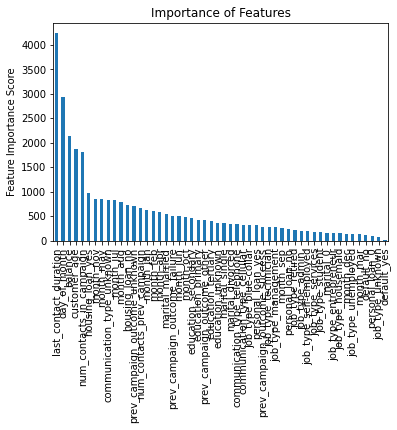

In [30]:
#64.9
i=1
smote=SMOTE()
X, y = smote.fit_sample(X,y)
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,max_depth=10,random_state=42)
     model = LGBMClassifier(n_estimators = 1000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76,
                        )
     model.fit(xtr, ytr)
     predictors = list(xtr)
     feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
     feat_imp.plot(kind='bar', title='Importance of Features')
     plt.ylabel('Feature Importance Score')
     pred=model.predict(xvl)
     print('F1_score',f1_score(yvl,pred))
     i+=1

In [32]:
sample = pd.read_csv("sample.csv")
sample['id'] = test['id']
#predictions = model.predict(pred_test)
sample['term_deposit_subscribed'] = lgb_preds_rounded
#sample['target'] = (probs_lgbm)/4
sample.to_csv('final.csv',index =False)